In [2]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd

In [3]:
# Base de dados
DATA_DIR = pathlib.Path.cwd().parent / 'data'
DATA_DIR.mkdir(parents=True, exist_ok=True)
covid_data = DATA_DIR / 'covid-19-country-statistics-dataset.xlsx'
happ_data = DATA_DIR / 'Happiness - 2019.csv'

### Análise Exploratória

Sobre a base de dados COVID:

A base de dado COVID contém algumas colunas sem identificação. Vamos deletar tais colunas

In [4]:
df_covid = pd.read_excel(covid_data)
df_covid.head()


,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active cases,Serious_Critical,Total Cases Per 1m Pop,...,Total Tests,Tests Per 1m Pop,Population,Continent,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,USA,"106,613,321",1.809,"1,159,697",35.0,"104,533,271",920.353,1.392,318.434,...,"1,176,758,558","3,514,755","334,805,269",North America,3.0,289.000,0.0,5.0,0.1,2.749
1,2,India,"44,924,811",NaN,531.424,NaN,"44,335,977",57.41,NaN,31.938,...,"925,077,322",657.654,"1,406,631,776",Asia,31.0,2.647,2.0,NaN,NaN,41.000
2,3,France,"39,974,426",6.609,166.425,NaN,"39,669,392",138.609,869.000,609.510,...,"271,490,188","4,139,547","65,584,518",Europe,2.0,394.000,0.0,101.0,NaN,2.113
3,4,Germany,"38,400,766",NaN,172.882,NaN,"38,189,800",38.084,NaN,457.786,...,"122,332,384","1,458,359","83,883,596",Europe,2.0,485.000,1.0,NaN,NaN,454.000
4,5,Brazil,"37,449,418",NaN,701.494,NaN,"36,249,161",498.763,NaN,173.897,...,"63,776,166",296.146,"215,353,593",South America,6.0,307.000,3.0,NaN,NaN,2.316


In [5]:
drop_columns = ["Unnamed: 15", "Unnamed: 16",	"Unnamed: 17",	"Unnamed: 18",	"Unnamed: 19",	"Unnamed: 20"]
df_covid = df_covid.drop(drop_columns, axis=1)
df_covid.head()


,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active cases,Serious_Critical,Total Cases Per 1m Pop,Deaths Per 1m Pop,Total Tests,Tests Per 1m Pop,Population,Continent
0,1,USA,"106,613,321",1.809,"1,159,697",35.0,"104,533,271",920.353,1.392,318.434,3.464,"1,176,758,558","3,514,755","334,805,269",North America
1,2,India,"44,924,811",NaN,531.424,NaN,"44,335,977",57.41,NaN,31.938,378.000,"925,077,322",657.654,"1,406,631,776",Asia
2,3,France,"39,974,426",6.609,166.425,NaN,"39,669,392",138.609,869.000,609.510,2.538,"271,490,188","4,139,547","65,584,518",Europe
3,4,Germany,"38,400,766",NaN,172.882,NaN,"38,189,800",38.084,NaN,457.786,2.061,"122,332,384","1,458,359","83,883,596",Europe
4,5,Brazil,"37,449,418",NaN,701.494,NaN,"36,249,161",498.763,NaN,173.897,3.257,"63,776,166",296.146,"215,353,593",South America


Sobre a base de dados de felicidade:

In [6]:
df_happ = pd.read_csv(happ_data)
df_happ.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
#df = df_covid.join(df_happ, how='inner')
df = pd.merge(df_covid, df_happ, on='Country')
df.head()


,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active cases,Serious_Critical,Total Cases Per 1m Pop,...,Population,Continent,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2,India,"44,924,811",NaN,531.424,NaN,"44,335,977",57.41,NaN,31.938,...,"1,406,631,776",Asia,140,4.015,0.755,0.765,0.588,0.498,0.200,0.085
1,3,France,"39,974,426",6.609,166.425,NaN,"39,669,392",138.609,869.0,609.510,...,"65,584,518",Europe,24,6.592,1.324,1.472,1.045,0.436,0.111,0.183
2,4,Germany,"38,400,766",NaN,172.882,NaN,"38,189,800",38.084,NaN,457.786,...,"83,883,596",Europe,17,6.985,1.373,1.454,0.987,0.495,0.261,0.265
3,5,Brazil,"37,449,418",NaN,701.494,NaN,"36,249,161",498.763,NaN,173.897,...,"215,353,593",South America,32,6.300,1.004,1.439,0.802,0.390,0.099,0.086
4,6,Japan,"33,689,542",11.764,74.467,24.0,"21,725,273","11,889,802",48.0,268.261,...,"125,584,838",Asia,58,5.886,1.327,1.419,1.088,0.445,0.069,0.140


In [8]:
continuos_variables = ["Total Cases", 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'Active cases', 'Serious_Critical','Total Cases Per 1m Pop', 'Population','Score', 'GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df = df.replace(',','', regex=True)
for col in continuos_variables:
    df[col] = df[col].astype('float64')

In [9]:
df["Deaths per 1m Pop"] = df["Total Deaths"] / (df["Population"] / 1000000)
df.head()

,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active cases,Serious_Critical,Total Cases Per 1m Pop,...,Continent,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Deaths per 1m Pop
0,2,India,44924811.0,NaN,531.424,NaN,44335977.0,5.741000e+01,NaN,31.938,...,Asia,140,4.015,0.755,0.765,0.588,0.498,0.200,0.085,0.377799
1,3,France,39974426.0,6.609,166.425,NaN,39669392.0,1.386090e+02,869.0,609.510,...,Europe,24,6.592,1.324,1.472,1.045,0.436,0.111,0.183,2.537565
2,4,Germany,38400766.0,NaN,172.882,NaN,38189800.0,3.808400e+01,NaN,457.786,...,Europe,17,6.985,1.373,1.454,0.987,0.495,0.261,0.265,2.060975
3,5,Brazil,37449418.0,NaN,701.494,NaN,36249161.0,4.987630e+02,NaN,173.897,...,South America,32,6.300,1.004,1.439,0.802,0.390,0.099,0.086,3.257406
4,6,Japan,33689542.0,11.764,74.467,24.0,21725273.0,1.188980e+07,48.0,268.261,...,Asia,58,5.886,1.327,1.419,1.088,0.445,0.069,0.140,0.592962


In [10]:
df.shape

(138, 24)

In [11]:
features_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
features = df[features_columns].copy()
features.head()


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,4.015,0.755,0.765,0.588,0.498,0.200,0.085
1,6.592,1.324,1.472,1.045,0.436,0.111,0.183
2,6.985,1.373,1.454,0.987,0.495,0.261,0.265
3,6.300,1.004,1.439,0.802,0.390,0.099,0.086
4,5.886,1.327,1.419,1.088,0.445,0.069,0.140


In [12]:
y = df["Deaths per 1m Pop"].copy()
y.head()


0    0.377799
1    2.537565
2    2.060975
3    3.257406
4    0.592962
Name: Deaths per 1m Pop, dtype: float64

In [13]:
print(features.shape, y.shape)

(138, 7) (138,)


In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

coef_values = []

rs = ShuffleSplit(n_splits=10000, test_size=.25, random_state=0)
rs.get_n_splits(features)
print(rs)

for i, (train_index, test_index) in enumerate(rs.split(features)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    Xtrain_lista = []
    Xtest_lista = []
    ytrain_lista = []
    ytest_lista = []

        
    for train_index in train_index:
        Xtrain_lista.append(features.iloc[train_index])
        ytrain_lista.append(y.iloc[train_index])    
    
    for test_index in test_index:
        Xtest_lista.append(features.iloc[test_index])
        ytest_lista.append(y.iloc[test_index])
    
    Xtrain = pd.DataFrame(Xtrain_lista)    
    Xtest = pd.DataFrame(Xtest_lista) 
    ytrain = pd.DataFrame(ytrain_lista)
    ytest = pd.DataFrame(ytest_lista)

    model = LinearRegression()
    
    model.fit(Xtrain, ytrain)
    coef_values.append(model.coef_)
    
    
    
    
    
   
        
 


ShuffleSplit(n_splits=10000, random_state=0, test_size=0.25, train_size=None)


In [30]:
coef_values

[array([[  18486.10179241,   16843.082549  ,  -12318.19618644,
           66632.51016823,    9069.29989312,  576532.73289154,
         -227221.58397486]]),
 array([[  15244.06539506,   29232.60304987,  -24756.28169908,
           81963.55764149,    6860.73474299,  701588.84185457,
         -357200.00162437]]),
 array([[  17549.48563462,    2606.2150393 ,  -11933.55640855,
           -1531.20599326,     220.2001424 ,  145425.6546619 ,
         -132529.0924814 ]]),
 array([[  23320.83251695,  -11985.74104711,  -23018.02381532,
           20389.64808818,  -26467.30466884,  173617.49198741,
         -163663.42540925]]),
 array([[ 15998.40739663, -10773.35176144, -15813.9556946 ,
          26510.02231869, -31964.43714646, 184254.16910568,
         -91124.41323738]]),
 array([[  14321.72564448,   17073.88399059,  -11988.93364531,
          -15510.49498713,   15442.78248454,  176558.58587035,
         -126984.65720524]]),
 array([[  14960.04618219,    7409.87209861,    -416.65720199,
        

In [31]:
Score_coef = []
GDP_coef = []
Social_coef = []
Health_coef = []
Freedom_coef = []
Generosity_coef = []
Corruption_coef = []
for i in range(0,1000):
    Score_coef.append(coef_values[i][0][0])
    GDP_coef.append(coef_values[i][0][1])
    Social_coef.append(coef_values[i][0][2])
    Health_coef.append(coef_values[i][0][3])
    Freedom_coef.append(coef_values[i][0][4])
    Generosity_coef.append(coef_values[i][0][5])
    Corruption_coef .append(coef_values[i][0][6])
    
    

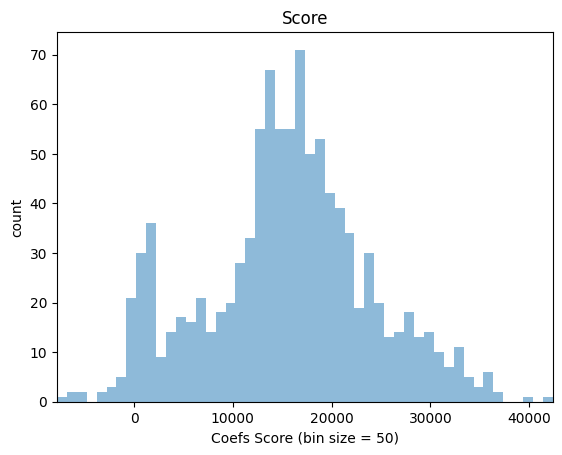

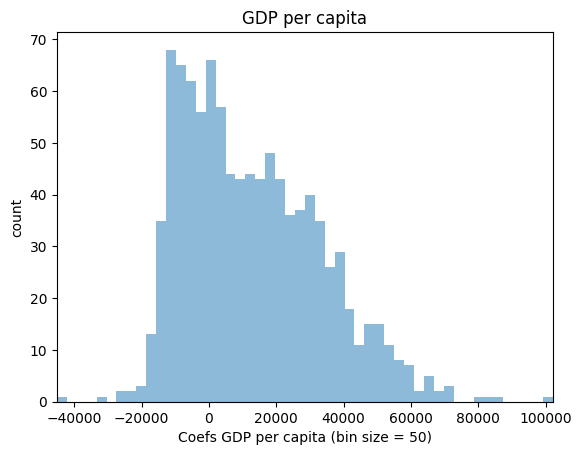

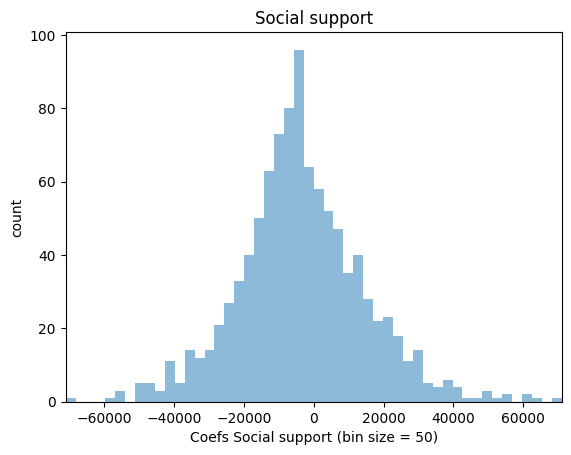

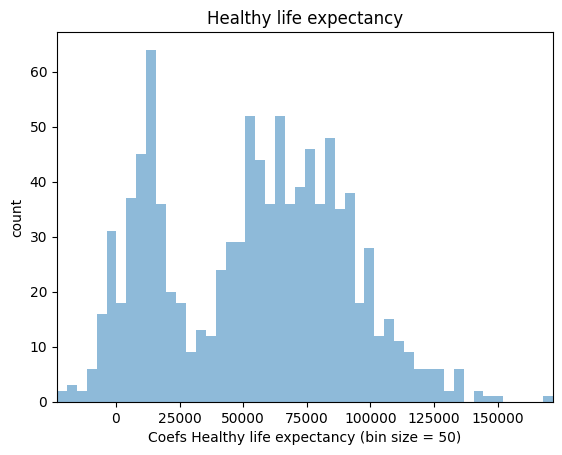

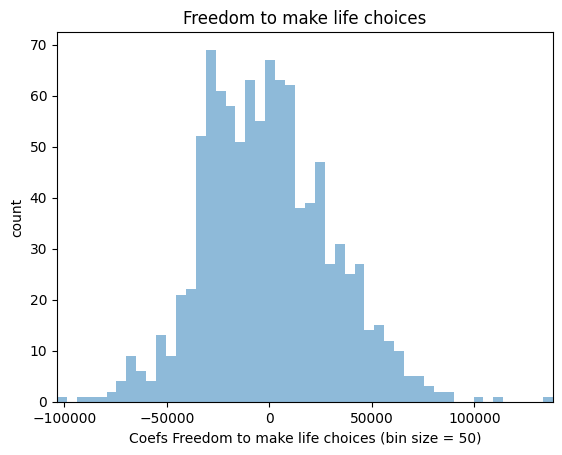

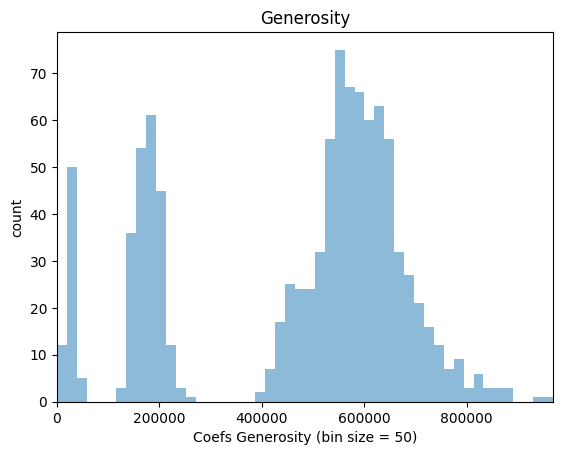

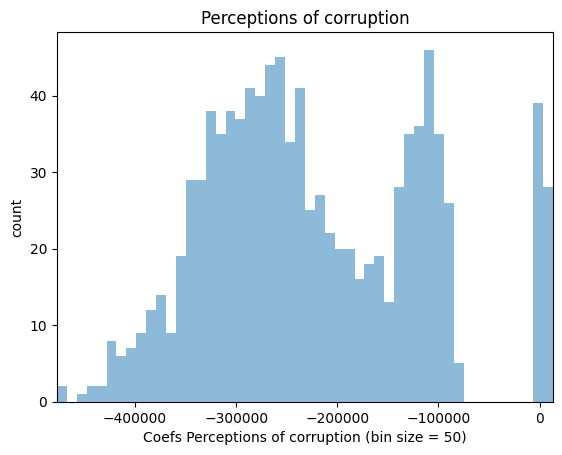

In [32]:
coefs = [Score_coef, GDP_coef, Social_coef, Health_coef, Freedom_coef, Generosity_coef, Corruption_coef]
n = 0
for coef in coefs:
    plt.xlim([min(coef)-5, max(coef)+5])
    plt.hist(coef, bins=50, alpha=0.5)
    plt.title(features_columns[n])
    plt.xlabel("Coefs " + features_columns[n] + ' (bin size = 50)')
    plt.ylabel('count')

    plt.show()
    n+=1
    


1. limpar base de dados, criar histogramas e limpar outliers
2. a cada elemento desse for https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

fazer um split treinamento teste e gerar o peso dos parametros. guardar tais pesos em um dicionacio (parametros:[lista de pesos]). a partir desses pesos gerar histogramas 